In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
df = pd.read_feather(
    '../data/preprocessed/adult.feather',
#     'https://raw.githubusercontent.com/sesise0307/pydata2021-eda/main/data/preprocessed/adult.feather',
)

In [37]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,hours_per_week,native_country,income,age_group,income_exceed_50k,fake_income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,40,United-States,<=50K,30~39,False,44506
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,13,United-States,<=50K,50~59,False,48120
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,40,United-States,<=50K,30~39,False,13343
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,40,United-States,<=50K,50~59,False,42772
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,40,Cuba,<=50K,20~29,False,37312


# ipywidgets

https://ipywidgets.readthedocs.io/en/latest/

ipywidgets, also known as jupyter-widgets or simply widgets, are interactive HTML widgets for Jupyter notebooks and the IPython kernel.

Notebooks come alive when interactive widgets are used. Users gain control of their data and can visualize changes in the data.

In [38]:
import ipywidgets as widgets

In [39]:
widgets.IntSlider()

IntSlider(value=0)

In [40]:
def plot_bar(x, y, hue):
    sns.barplot(data=df,
                x=x,
                y=y,
                hue=hue,
                ci='sd')

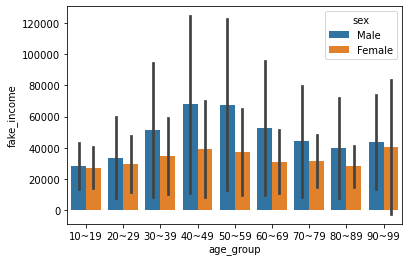

In [41]:
plot_bar(x='age_group', y='fake_income', hue='sex')

In [48]:
@widgets.interact(
    x=df.select_dtypes(exclude='number'),
    y=df.select_dtypes(include='number'),
    hue=df.select_dtypes(exclude='number'),
)
def plot_bar(x='age_group', y='fake_income', hue='sex'):    
    fig, ax = plt.subplots(1, 1, figsize=(15, 5))
    sns.barplot(data=df,
                x=x,
                y=y,
                hue=hue,
                ci='sd',
                ax=ax)

interactive(children=(Dropdown(description='x', index=10, options=('workclass', 'education', 'education_num', …

# plot.ly and plot.ly express (parallel coordinates, parallel category)

Plotly Python Open Source Graphing Library: https://plotly.com/python/

Plotly Express in Python: https://plotly.com/python/plotly-express/

Start from plot.ly express then fine tune with plot.ly

In [ ]:
import plotly.express as px

In [17]:
fig = px.scatter(x=df['education_num'], y=df['hours_per_week'])
fig.show()

In [32]:
fig = px.parallel_categories(
    df.sample(500),
    dimensions=[
        'age_group', 'education', 'education_num',
        'race', 'workclass', 'sex', 'income'
    ],
    color='hours_per_week',
)

fig.show()

In [27]:
fig = px.parallel_coordinates(
    df.sample(10000)
)

fig.show()

Another nice parallel coordinates plotting library from Facebook

HiPlot: https://github.com/facebookresearch/hiplot

Much more responsive with lots of data

# Others
## bokeh
## altair